# Data Science: Bank Marketing (Campaign) - Group Project

**Problem Statement:** ABC Bank wants to sell it's term deposit product to customers and before launching the product they want to develop a model which help them in understanding whether a particular customer will buy their product or not (based on customer's past interaction with bank or other Financial Institution).

**Why ML Model:** Bank wants to use ML model to shortlist customer whose chances of buying the product is more so that their marketing channel (tele marketing, SMS/email marketing etc)  can focus only to those customers whose chances of buying the product is more. This will save resource and their time ( which is directly involved in the cost ( resource billing)).

**Data Set Information :** The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

**Objective:** Obtain a model that determines whether or not X customer will buy your product, based on past interactions with the bank and other financial institutions.

**Steps**
1. EDA
2. Outlier detection and elimination
3. Missing values imputation
4. Encoding categorical features
5. Data Scaling and Normalization
6. Data transformation

## Quick EDA

In [1]:
# Importings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset loading
bank_df = pd.read_csv("C:/Users/Ecuad/OneDrive/Documentos/Data_Glacier/repos/PROJECT/bank-additional/bank-additional/bank-additional-full.csv", sep=";")
#bank_df = pd.read_csv("Datasets/bank-additional/bank-additional-full.csv", sep=";")
print(bank_df.head())
print(bank_df.shape)

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [3]:
bank_df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The dataset has 21 columns (features) and 41188 rows (instances)

### Outlier detection

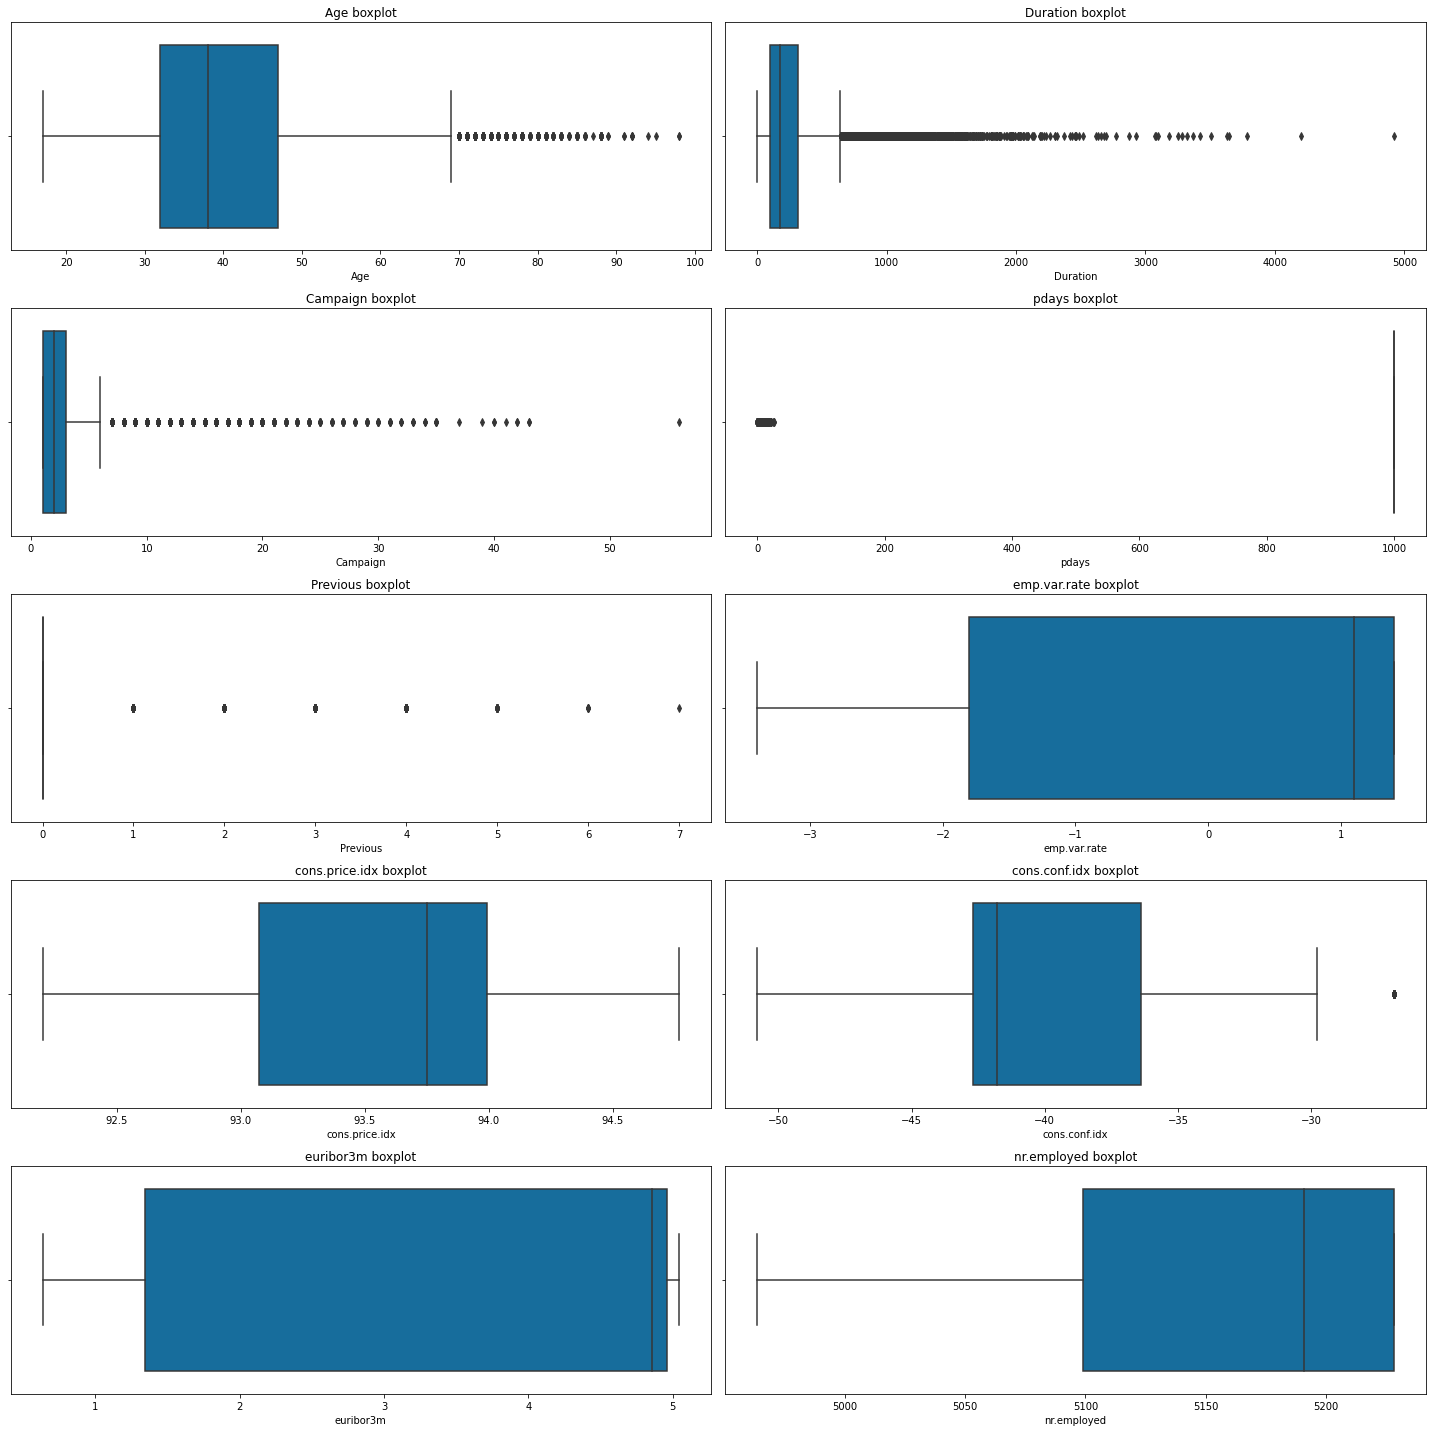

In [5]:
plt.figure(figsize = (20,20))
plt.subplot(5, 2, 1)
sns.boxplot(data = bank_df, x= 'age', palette = 'colorblind')
plt.title('Age boxplot')
plt.xlabel('Age')

plt.subplot(5, 2, 2)
sns.boxplot(data = bank_df, x= 'duration', palette = 'colorblind')
plt.title('Duration boxplot')
plt.xlabel('Duration')

plt.subplot(5, 2, 3)
sns.boxplot(data = bank_df, x= 'campaign', palette = 'colorblind')
plt.title('Campaign boxplot')
plt.xlabel('Campaign')

plt.subplot(5, 2, 4)
sns.boxplot(data = bank_df, x= 'pdays', palette = 'colorblind')
plt.title('pdays boxplot')
plt.xlabel('pdays')

plt.subplot(5, 2, 5)
sns.boxplot(data = bank_df, x= 'previous', palette = 'colorblind')
plt.title('Previous boxplot')
plt.xlabel('Previous')

plt.subplot(5, 2, 6)
sns.boxplot(data = bank_df, x= 'emp.var.rate', palette = 'colorblind')
plt.title('emp.var.rate boxplot')
plt.xlabel('emp.var.rate')

plt.subplot(5, 2, 7)
sns.boxplot(data = bank_df, x= 'cons.price.idx', palette = 'colorblind')
plt.title('cons.price.idx boxplot')
plt.xlabel('cons.price.idx')

plt.subplot(5, 2, 8)
sns.boxplot(data = bank_df, x= 'cons.conf.idx', palette = 'colorblind')
plt.title('cons.conf.idx boxplot')
plt.xlabel('cons.conf.idx')

plt.subplot(5, 2, 9)
sns.boxplot(data = bank_df, x= 'euribor3m', palette = 'colorblind')
plt.title('euribor3m boxplot')
plt.xlabel('euribor3m')

plt.subplot(5, 2, 10)
sns.boxplot(data = bank_df, x= 'nr.employed', palette = 'colorblind')
plt.title('nr.employed boxplot')
plt.xlabel('nr.employed')

plt.tight_layout()
plt.show()

# Outlier detection using Z-Score

In [6]:
#VARIABLE AGE
from scipy import stats
#Z-SCORE
z1=np.abs(stats.zscore(bank_df['age']))

#NEW SIZE
z_bank_df = bank_df[(z1 < 3) & (-3 < z1)]
print(z1),bank_df.shape, z_bank_df['age'].shape

[1.53303429 1.62899323 0.29018564 ... 1.53303429 0.38152696 3.26029527]


(None, (41188, 21), (40819,))

<AxesSubplot:xlabel='age'>

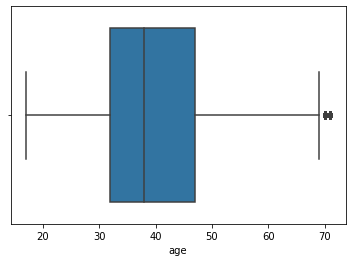

In [7]:
#BOXPLOT
sns.boxplot(x=z_bank_df['age'])

In [8]:
#Z-SCORE
z1=np.abs(stats.zscore(bank_df['duration']))

#NEW SIZE
z_bank_df = bank_df[(z1 < 3) & (-3 < z1)]
print(z1), bank_df.shape, z_bank_df['duration'].shape

[0.01047142 0.42150051 0.12451981 ... 0.26722482 0.70856893 0.07438021]


(None, (41188, 21), (40327,))

<AxesSubplot:xlabel='duration'>

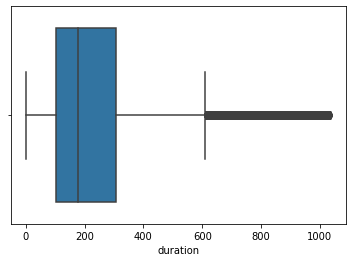

In [9]:
#BOXPLOT
sns.boxplot(x=z_bank_df['duration'])

In [10]:
#Z-SCORE
z1=np.abs(stats.zscore(bank_df['campaign']))

#NEW SIZE
z_bank_df = bank_df[(z1 < 3) & (-3 < z1)]
print(z1), bank_df.shape, z_bank_df['campaign'].shape

[0.56592197 0.56592197 0.56592197 ... 0.20490853 0.56592197 0.15610492]


(None, (41188, 21), (40319,))

<AxesSubplot:xlabel='campaign'>

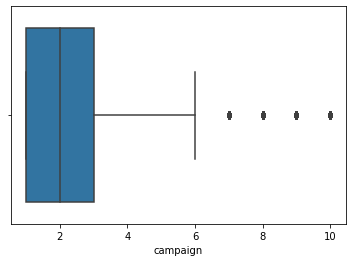

In [11]:
#BOXPLOT
sns.boxplot(x=z_bank_df['campaign'])

In [12]:
#Z-SCORE
z1=np.abs(stats.zscore(bank_df['pdays']))

#NEW SIZE
z_bank_df = bank_df[(z1 < 3) & (-3 < z1)]
print(z1), bank_df.shape, z_bank_df['pdays'].shape

[0.1954139 0.1954139 0.1954139 ... 0.1954139 0.1954139 0.1954139]


(None, (41188, 21), (39673,))

<AxesSubplot:xlabel='pdays'>

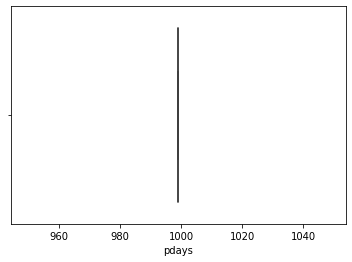

In [13]:
#BOXPLOT
sns.boxplot(x=z_bank_df['pdays'])

In [14]:
#Z-SCORE
z1=np.abs(stats.zscore(bank_df['previous']))

#NEW SIZE
z_bank_df = bank_df[(z1 < 3) & (-3 < z1)]
print(z1), bank_df.shape, z_bank_df['previous'].shape

[0.34949428 0.34949428 0.34949428 ... 0.34949428 0.34949428 1.67113606]


(None, (41188, 21), (40124,))

<AxesSubplot:xlabel='previous'>

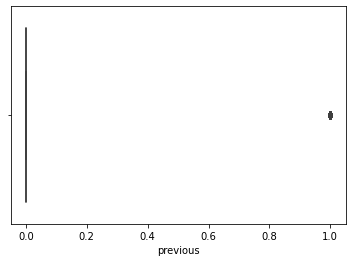

In [15]:
#BOXPLOT
sns.boxplot(x=z_bank_df['previous'])

In [16]:
#Z-SCORE
z1=np.abs(stats.zscore(bank_df['emp.var.rate']))

#NEW SIZE
z_bank_df = bank_df[(z1 < 3)]
print(z1), bank_df.shape, z_bank_df['emp.var.rate'].shape

[0.64809227 0.64809227 0.64809227 ... 0.75234254 0.75234254 0.75234254]


(None, (41188, 21), (41188,))

<AxesSubplot:xlabel='emp.var.rate'>

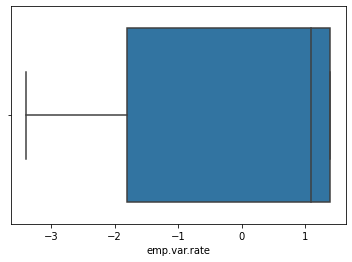

In [17]:
#BOXPLOT
sns.boxplot(x=z_bank_df['emp.var.rate'])

In [18]:
#Z-SCORE
z1=np.abs(stats.zscore(bank_df['cons.price.idx']))

#NEW SIZE
z_bank_df = bank_df[(z1 < 3) & (-3 < z1)]
print(z1), bank_df.shape, z_bank_df['cons.price.idx'].shape

[0.72272247 0.72272247 0.72272247 ... 2.05816805 2.05816805 2.05816805]


(None, (41188, 21), (41188,))

<AxesSubplot:xlabel='cons.price.idx'>

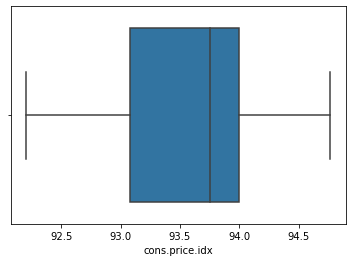

In [19]:
#BOXPLOT
sns.boxplot(x=z_bank_df['cons.price.idx'])

In [20]:
#Z-SCORE
z1=np.abs(stats.zscore(bank_df['cons.conf.idx']))

#NEW SIZE
z_bank_df = bank_df[(z1 < 3) & (-3 < z1)]
print(z1), bank_df.shape, z_bank_df['cons.conf.idx'].shape

[0.88644656 0.88644656 0.88644656 ... 2.22495344 2.22495344 2.22495344]


(None, (41188, 21), (41188,))

<AxesSubplot:xlabel='cons.conf.idx'>

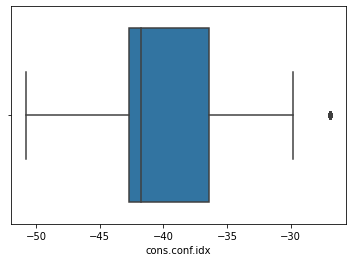

In [21]:
#BOXPLOT
sns.boxplot(x=z_bank_df['cons.conf.idx'])

In [22]:
#Z-SCORE
z1=np.abs(stats.zscore(bank_df['euribor3m']))

#NEW SIZE
z_bank_df = bank_df[(z1 < 3) & (-3 < z1)]
print(z1), bank_df.shape, z_bank_df['euribor3m'].shape

[0.71245988 0.71245988 0.71245988 ... 1.49518647 1.49518647 1.49518647]


(None, (41188, 21), (41188,))

<AxesSubplot:xlabel='euribor3m'>

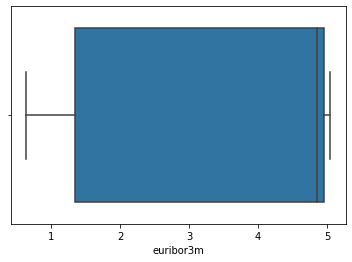

In [23]:
#BOXPLOT
sns.boxplot(x=z_bank_df['euribor3m'])

In [24]:
#Z-SCORE
z1=np.abs(stats.zscore(bank_df['nr.employed']))

#NEW SIZE
z_bank_df = bank_df[(z1 < 3) & (-3 < z1)]
print(z1), bank_df.shape, z_bank_df['nr.employed'].shape

[0.33167991 0.33167991 0.33167991 ... 2.8156966  2.8156966  2.8156966 ]


(None, (41188, 21), (41188,))

<AxesSubplot:xlabel='nr.employed'>

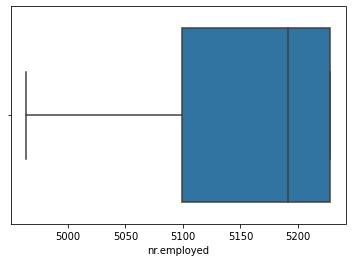

In [25]:
#BOXPLOT
sns.boxplot(x=z_bank_df['nr.employed'])

According with this analysis the variables that have outliers are,

* age
* campaing
* previous

# Python Function to calculate Information Value and WOE

In [26]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [27]:
#TRANSFORM IN BINARY
bank_df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [28]:
aux = bank_df['y'] == 'no'
aux1 = bank_df['y'] == 'yes'

#CONVIERTO
bank_df.at[aux, 'y'] = 0
bank_df.at[aux1, 'y'] = 1

bank_df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [29]:
#APPLY FUNCTION
iv, woe = iv_woe(data = bank_df, target = 'y', bins=10, show_woe = True)
print(iv)
#print(woe)

Information value of age is 0.139397
  Variable          Cutoff     N  Events  % of Events  Non-Events  \
0      age  (16.999, 28.0]  4216     736     0.158621        3480   
1      age    (28.0, 31.0]  5114     608     0.131034        4506   
2      age    (31.0, 33.0]  3679     394     0.084914        3285   
3      age    (33.0, 35.0]  3504     351     0.075647        3153   
4      age    (35.0, 38.0]  4662     434     0.093534        4228   
5      age    (38.0, 41.0]  3871     311     0.067026        3560   
6      age    (41.0, 45.0]  4311     348     0.075000        3963   
7      age    (45.0, 49.0]  3776     289     0.062284        3487   
8      age    (49.0, 55.0]  4473     428     0.092241        4045   
9      age    (55.0, 98.0]  3582     741     0.159698        2841   

   % of Non-Events       WoE        IV  
0         0.095217  0.510355  0.032358  
1         0.123290  0.060922  0.000472  
2         0.089882 -0.056859  0.000282  
3         0.086270 -0.131411  0.001396 

Information value of campaign is 0.054246
   Variable        Cutoff      N  Events  % of Events  Non-Events  \
0  campaign  (0.999, 2.0]  28212    3511     0.756681       24701   
1  campaign    (2.0, 3.0]   5341     574     0.123707        4767   
2  campaign    (3.0, 5.0]   4250     369     0.079526        3881   
3  campaign   (5.0, 56.0]   3385     186     0.040086        3199   

   % of Non-Events       WoE        IV  
0         0.675851  0.112969  0.009131  
1         0.130431 -0.052931  0.000356  
2         0.106189 -0.289139  0.007709  
3         0.087529 -0.780935  0.037050  
Information value of pdays is 0.0
  Variable           Cutoff      N  Events  % of Events  Non-Events  \
0    pdays  (-0.001, 999.0]  41188    4640          1.0       36548   

   % of Non-Events  WoE   IV  
0              1.0  0.0  0.0  
Information value of previous is 0.3505
   Variable  Cutoff      N  Events  % of Events  Non-Events  % of Non-Events  \
0  previous       0  35563    3141     0.676940 

In [30]:
print(iv)

         Variable        IV
0             age  0.139397
0             job  0.188713
0         marital  0.028215
0       education  0.048576
0         default  0.127776
0         housing  0.001383
0            loan  0.000269
0         contact  0.251663
0           month  0.485117
0     day_of_week  0.006493
0        duration  1.961794
0        campaign  0.054246
0           pdays  0.000000
0        previous  0.350500
0        poutcome  0.547671
0    emp.var.rate  1.069750
0  cons.price.idx  0.440236
0   cons.conf.idx  0.860740
0       euribor3m  1.046047
0     nr.employed  1.173723


Accoding with this table,

* There are six variables with a suspicious power prediction: nr.employed, euribor3m, cons.conf.idx, emp.var.rate, poutcome and duration.

* There are three variables with a strong power prediction: month, previous and cons.price.idx.

* There are three variables with a medium power prediction: age, job and contact.

* There are four variables with a weak power prediction: marital, education, campaign and pdays.

* There are four variables with no power prediction: default, housing, loan and day_of_week.

# Replace variables with WoE Values

The variables that will be treated using WOE values are,

* age
* campaing
* duration

In [31]:
# AGE
#CREATE A DATAFRAME
age= pd.DataFrame(bank_df['age'])
age.columns = ['age']
age, age.columns

(       age
 0       56
 1       57
 2       37
 3       40
 4       56
 ...    ...
 41183   73
 41184   46
 41185   56
 41186   44
 41187   74
 
 [41188 rows x 1 columns],
 Index(['age'], dtype='object'))

In [32]:
age_table = woe[:10]
age_table

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,age,"(16.999, 28.0]",4216,736,0.158621,3480,0.095217,0.510355,0.032358
1,age,"(28.0, 31.0]",5114,608,0.131034,4506,0.123290,0.060922,0.000472
2,age,"(31.0, 33.0]",3679,394,0.084914,3285,0.089882,-0.056859,0.000282
3,age,"(33.0, 35.0]",3504,351,0.075647,3153,0.086270,-0.131411,0.001396
4,age,"(35.0, 38.0]",4662,434,0.093534,4228,0.115683,-0.212528,0.004707
5,age,"(38.0, 41.0]",3871,311,0.067026,3560,0.097406,-0.373811,0.011356
6,age,"(41.0, 45.0]",4311,348,0.075000,3963,0.108433,-0.368642,0.012325
7,age,"(45.0, 49.0]",3776,289,0.062284,3487,0.095409,-0.426458,0.014126
8,age,"(49.0, 55.0]",4473,428,0.092241,4045,0.110676,-0.182202,0.003359
9,age,"(55.0, 98.0]",3582,741,0.159698,2841,0.077733,0.720001,0.059015


In [33]:
#CREATE STRUCTURE TO EXTRACT LIMITS
idx = pd.IntervalIndex(age_table['Cutoff'])

#INTERVALS , LIMITS AND WOE VALUES
inter = pd.DataFrame({'intervals': idx, 'left': idx.left, 'right': idx.right})
inter['WOE'] = age_table['WoE']
inter

,intervals,left,right,WOE
0,"(16.999, 28.0]",16.999,28.0,0.510355
1,"(28.0, 31.0]",28.000,31.0,0.060922
2,"(31.0, 33.0]",31.000,33.0,-0.056859
3,"(33.0, 35.0]",33.000,35.0,-0.131411
4,"(35.0, 38.0]",35.000,38.0,-0.212528
5,"(38.0, 41.0]",38.000,41.0,-0.373811
6,"(41.0, 45.0]",41.000,45.0,-0.368642
7,"(45.0, 49.0]",45.000,49.0,-0.426458
8,"(49.0, 55.0]",49.000,55.0,-0.182202
9,"(55.0, 98.0]",55.000,98.0,0.720001


In [34]:
#CREATE AUXILIARY VARIABLES
inter['left'][0],inter['right'][0]

aux1 = (inter['left'][0] <=  age) & (age < inter['right'][0])
aux2 = (inter['left'][1] <=  age) & (age < inter['right'][1])
aux3 = (inter['left'][2] <=  age) & (age < inter['right'][2])
aux4 = (inter['left'][3] <=  age) & (age < inter['right'][3])
aux5 = (inter['left'][4] <=  age) & (age < inter['right'][4])
aux6 = (inter['left'][5] <=  age) & (age < inter['right'][5])
aux7 = (inter['left'][6] <=  age) & (age < inter['right'][6])
aux8 = (inter['left'][7] <=  age) & (age < inter['right'][7])
aux9 = (inter['left'][8] <=  age) & (age < inter['right'][8])
aux10 = (inter['left'][9] <=  age) & (age <= inter['right'][9])

In [35]:
#REPLACE VALUES WITH WOE
age[aux1] = inter['WOE'][0]
age[aux2] = inter['WOE'][1]
age[aux3] = inter['WOE'][2]
age[aux4] = inter['WOE'][3]
age[aux5] = inter['WOE'][4]
age[aux6] = inter['WOE'][5]
age[aux7] = inter['WOE'][6]
age[aux8] = inter['WOE'][7]
age[aux9] = inter['WOE'][8]
age[aux10] = inter['WOE'][9]

age.value_counts()

age      
-0.212528    5014
-0.182202    4664
-0.368642    4486
 0.720001    4230
 0.060922    4168
-0.426458    4040
-0.373811    4000
-0.056859    3793
-0.131411    3578
 0.510355    3215
dtype: int64

In [36]:
#REPLACE OLD VARIABLE
bank_df['age'] = age
bank_df['age'].value_counts()

-0.212528    5014
-0.182202    4664
-0.368642    4486
 0.720001    4230
 0.060922    4168
-0.426458    4040
-0.373811    4000
-0.056859    3793
-0.131411    3578
 0.510355    3215
Name: age, dtype: int64

In [37]:
#CAMPAIGN
#CREATE A DATAFRAME
campaign= pd.DataFrame(bank_df['campaign'])
campaign.columns = ['campaign']
campaign['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

In [38]:
#SELECT VALUES FOR CAMPAIGN VARIABLE
aux_c = woe['Variable'] == 'campaign' 
campaign_table = woe[aux_c]
campaign_table

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,campaign,"(0.999, 2.0]",28212,3511,0.756681,24701,0.675851,0.112969,0.009131
1,campaign,"(2.0, 3.0]",5341,574,0.123707,4767,0.130431,-0.052931,0.000356
2,campaign,"(3.0, 5.0]",4250,369,0.079526,3881,0.106189,-0.289139,0.007709
3,campaign,"(5.0, 56.0]",3385,186,0.040086,3199,0.087529,-0.780935,0.037050


In [39]:
#CREATE STRUCTURE TO EXTRACT LIMITS
idx = pd.IntervalIndex(campaign_table['Cutoff'])

#INTERVALS , LIMITS AND WOE VALUES
inter = pd.DataFrame({'intervals': idx, 'left': idx.left, 'right': idx.right})
inter['WOE'] = campaign_table['WoE']
inter

,intervals,left,right,WOE
0,"(0.999, 2.0]",0.999,2.0,0.112969
1,"(2.0, 3.0]",2.000,3.0,-0.052931
2,"(3.0, 5.0]",3.000,5.0,-0.289139
3,"(5.0, 56.0]",5.000,56.0,-0.780935


In [40]:
#CREATE AUXILIARY VARIABLES
inter['left'][0],inter['right'][0]

aux1 = (inter['left'][0] <=  campaign) & (campaign < inter['right'][0])
aux2 = (inter['left'][1] <=  campaign) & (campaign < inter['right'][1])
aux3 = (inter['left'][2] <=  campaign) & (campaign < inter['right'][2])
aux4 = (inter['left'][3] <=  campaign) & (campaign <= inter['right'][3])

In [41]:
#REPLACE VALUES WITH WOE
campaign[aux1] = inter['WOE'][0]
campaign[aux2] = inter['WOE'][1]
campaign[aux3] = inter['WOE'][2]
campaign[aux4] = inter['WOE'][3]

campaign.value_counts()

campaign 
 0.112969    17642
-0.052931    10570
-0.289139     7992
-0.780935     4984
dtype: int64

In [42]:
#REPLACE OLD VARIABLE
bank_df['campaign'] = campaign
bank_df['campaign'].value_counts()

 0.112969    17642
-0.052931    10570
-0.289139     7992
-0.780935     4984
Name: campaign, dtype: int64

In [43]:
#DURATION
#CREATE A DATAFRAME
duration= pd.DataFrame(bank_df['duration'])
duration.columns = ['duration']
duration['duration'].value_counts()

85      170
90      170
136     168
73      167
124     164
       ... 
1108      1
980       1
4918      1
2453      1
2015      1
Name: duration, Length: 1544, dtype: int64

In [44]:
#SELECT VALUES FOR CAMPAIGN VARIABLE
aux_d = woe['Variable'] == 'duration' 
duration_table = woe[aux_d]
duration_table

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,duration,"(-0.001, 59.0]",4181,1,0.000216,4180,0.114370,-6.274154,0.716224
1,duration,"(59.0, 89.0]",4207,43,0.009267,4164,0.113932,-2.509119,0.262617
2,duration,"(89.0, 116.0]",3987,107,0.023060,3880,0.106162,-1.526849,0.126883
3,duration,"(116.0, 146.0]",4152,157,0.033836,3995,0.109308,-1.172641,0.088502
4,duration,"(146.0, 180.0]",4178,256,0.055172,3922,0.107311,-0.665267,0.034686
5,duration,"(180.0, 222.0]",4096,346,0.074569,3750,0.102605,-0.319160,0.008948
6,duration,"(222.0, 280.0]",4062,463,0.099784,3599,0.098473,0.013228,0.000017
7,duration,"(280.0, 368.0]",4103,554,0.119397,3549,0.097105,0.206656,0.004607
8,duration,"(368.0, 551.0]",4118,824,0.177586,3294,0.090128,0.678225,0.059316
9,duration,"(551.0, 4918.0]",4104,1889,0.407112,2215,0.060605,1.904707,0.659994


In [45]:
#CREATE STRUCTURE TO EXTRACT LIMITS
idx = pd.IntervalIndex(duration_table['Cutoff'])

#INTERVALS , LIMITS AND WOE VALUES
inter = pd.DataFrame({'intervals': idx, 'left': idx.left, 'right': idx.right})
inter['WOE'] = duration_table['WoE']
inter

,intervals,left,right,WOE
0,"(-0.001, 59.0]",-0.001,59.0,-6.274154
1,"(59.0, 89.0]",59.000,89.0,-2.509119
2,"(89.0, 116.0]",89.000,116.0,-1.526849
3,"(116.0, 146.0]",116.000,146.0,-1.172641
4,"(146.0, 180.0]",146.000,180.0,-0.665267
5,"(180.0, 222.0]",180.000,222.0,-0.319160
6,"(222.0, 280.0]",222.000,280.0,0.013228
7,"(280.0, 368.0]",280.000,368.0,0.206656
8,"(368.0, 551.0]",368.000,551.0,0.678225
9,"(551.0, 4918.0]",551.000,4918.0,1.904707


In [46]:
#CREATE AUXILIARY VARIABLES
inter['left'][0],inter['right'][0]

aux1 = (inter['left'][0] <=  duration) & (duration < inter['right'][0])
aux2 = (inter['left'][1] <=  duration) & (duration < inter['right'][1])
aux3 = (inter['left'][2] <=  duration) & (duration < inter['right'][2])
aux4 = (inter['left'][3] <=  duration) & (duration < inter['right'][3])
aux5 = (inter['left'][4] <=  duration) & (duration < inter['right'][4])
aux6 = (inter['left'][5] <=  duration) & (duration < inter['right'][5])
aux7 = (inter['left'][6] <=  duration) & (duration < inter['right'][6])
aux8 = (inter['left'][7] <=  duration) & (duration < inter['right'][7])
aux9 = (inter['left'][8] <=  duration) & (duration < inter['right'][8])
aux10 = (inter['left'][9] <=  duration) & (duration <= inter['right'][9])

In [47]:
#REPLACE VALUES WITH WOE
duration[aux1] = inter['WOE'][0]
duration[aux2] = inter['WOE'][1]
duration[aux3] = inter['WOE'][2]
duration[aux4] = inter['WOE'][3]
duration[aux5] = inter['WOE'][4]
duration[aux6] = inter['WOE'][5]
duration[aux7] = inter['WOE'][6]
duration[aux8] = inter['WOE'][7]
duration[aux9] = inter['WOE'][8]
duration[aux10] = inter['WOE'][9]

duration.value_counts()

duration 
-2.509119    4185
-1.172641    4176
-0.665267    4163
 0.206656    4132
 0.678225    4127
 1.904707    4123
-0.319160    4120
 0.013228    4098
-6.274154    4050
-1.526849    4014
dtype: int64

In [48]:
#REPLACE OLD VARIABLE
bank_df['duration'] = duration
bank_df['duration'].value_counts()

-2.509119    4185
-1.172641    4176
-0.665267    4163
 0.206656    4132
 0.678225    4127
 1.904707    4123
-0.319160    4120
 0.013228    4098
-6.274154    4050
-1.526849    4014
Name: duration, dtype: int64

# Check skew

In [49]:
bank_df.skew()

age               1.149065
duration         -1.299336
campaign         -1.319181
pdays            -4.922190
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
y                 2.450330
dtype: float64

pdays and previous are the variables that wil be treatead.

In [50]:
bank_df['pdays'] = np.sqrt(bank_df['pdays'])
bank_df['previous'] = np.sqrt(bank_df['previous'])

In [51]:
#Check again
bank_df.skew()

age               1.149065
duration         -1.299336
campaign         -1.319181
pdays            -4.927351
previous          2.388752
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
y                 2.450330
dtype: float64

Due to the values of the variable pdays the sqrt function have no effect in it.

In [52]:
#NEW DATA
bank_df2 = bank_df.copy()

In [53]:
bank_df2.reset_index(drop=True, inplace=True)

In [54]:
bank_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  float64
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  float64
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [55]:
bank_df2.shape

(41188, 21)

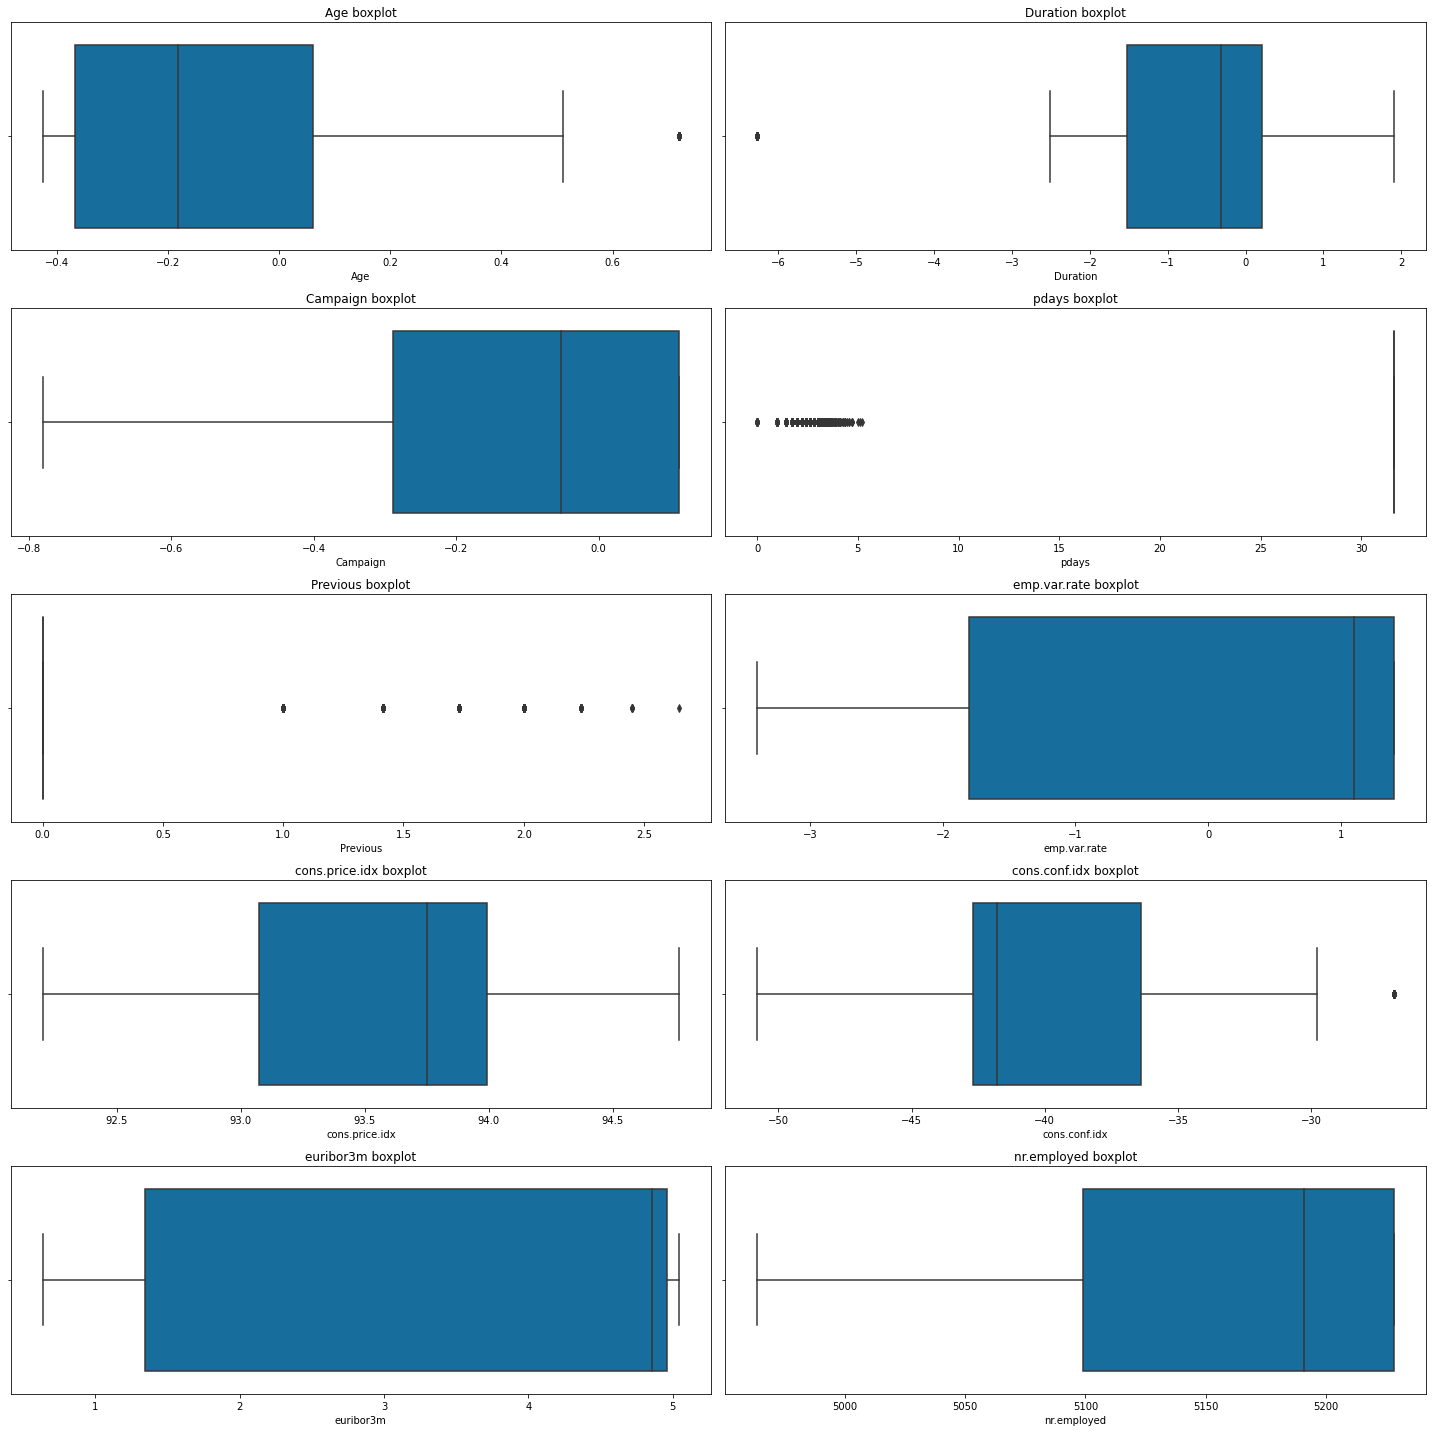

In [56]:
plt.figure(figsize = (20,20))
plt.subplot(5, 2, 1)
sns.boxplot(data = bank_df2, x= 'age', palette = 'colorblind')
plt.title('Age boxplot')
plt.xlabel('Age')

plt.subplot(5, 2, 2)
sns.boxplot(data = bank_df2, x= 'duration', palette = 'colorblind')
plt.title('Duration boxplot')
plt.xlabel('Duration')

plt.subplot(5, 2, 3)
sns.boxplot(data = bank_df2, x= 'campaign', palette = 'colorblind')
plt.title('Campaign boxplot')
plt.xlabel('Campaign')

plt.subplot(5, 2, 4)
sns.boxplot(data = bank_df2, x= 'pdays', palette = 'colorblind')
plt.title('pdays boxplot')
plt.xlabel('pdays')

plt.subplot(5, 2, 5)
sns.boxplot(data = bank_df2, x= 'previous', palette = 'colorblind')
plt.title('Previous boxplot')
plt.xlabel('Previous')

plt.subplot(5, 2, 6)
sns.boxplot(data = bank_df2, x= 'emp.var.rate', palette = 'colorblind')
plt.title('emp.var.rate boxplot')
plt.xlabel('emp.var.rate')

plt.subplot(5, 2, 7)
sns.boxplot(data = bank_df2, x= 'cons.price.idx', palette = 'colorblind')
plt.title('cons.price.idx boxplot')
plt.xlabel('cons.price.idx')

plt.subplot(5, 2, 8)
sns.boxplot(data = bank_df2, x= 'cons.conf.idx', palette = 'colorblind')
plt.title('cons.conf.idx boxplot')
plt.xlabel('cons.conf.idx')

plt.subplot(5, 2, 9)
sns.boxplot(data = bank_df2, x= 'euribor3m', palette = 'colorblind')
plt.title('euribor3m boxplot')
plt.xlabel('euribor3m')

plt.subplot(5, 2, 10)
sns.boxplot(data = bank_df2, x= 'nr.employed', palette = 'colorblind')
plt.title('nr.employed boxplot')
plt.xlabel('nr.employed')

plt.tight_layout()
plt.show()

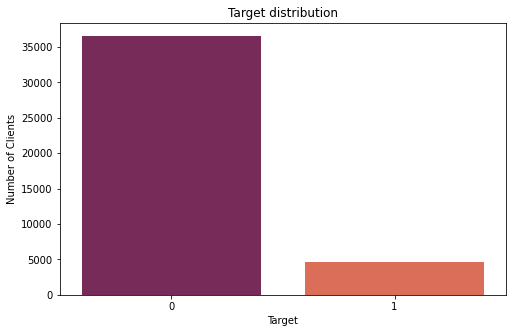

The amount of "no" target is =  36,548
The amount of "yes" target is = 4,640
The percentage of "no" target is = 88.73 %
The percentage of "yes" target is = 11.27 %


In [57]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.countplot(x= 'y', data= bank_df2, palette='rocket')
plt.xlabel("Target") 
plt.ylabel('Number of Clients')
plt.title("Target distribution")  
plt.show()
#Finding the percentages of our target
per_target= (bank_df['y'] == 1).value_counts().to_frame('q')
n_target_q = per_target.q.iloc[0]
y_target_q = per_target.q.iloc[1]
total=per_target.q.sum() 
print('The amount of "no" target is =  {:,}'.format(n_target_q))
print('The amount of "yes" target is = {:,}'.format(y_target_q))
print(f'The percentage of "no" target is = {round((n_target_q/total)*100,2)}','%')
print(f'The percentage of "yes" target is = {round((y_target_q/total)*100,2)}','%')

## **Categorical Features Analysis**

In [58]:
#Categorical features

categorical = bank_df2.select_dtypes(include="object")
categorical.drop("y", axis=1, inplace=True)
categorical_list = categorical.columns.to_list()

In [59]:
for cat in categorical_list:
    print(f"Column: {cat} unique values")
    print(bank_df2[cat].unique())

Column: job unique values
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Column: marital unique values
['married' 'single' 'divorced' 'unknown']
Column: education unique values
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Column: default unique values
['no' 'unknown' 'yes']
Column: housing unique values
['no' 'yes' 'unknown']
Column: loan unique values
['no' 'yes' 'unknown']
Column: contact unique values
['telephone' 'cellular']
Column: month unique values
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Column: day_of_week unique values
['mon' 'tue' 'wed' 'thu' 'fri']
Column: poutcome unique values
['nonexistent' 'failure' 'success']


**Job**

In [60]:
bank_df2.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

##############################################
Unkown job clients =  330
##############################################
Percentage of unknown client's job = 0.8 %


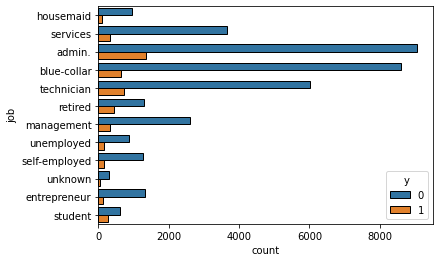

In [61]:
sns.countplot(data=bank_df2, y='job',hue ='y', edgecolor ='black')
print('##############################################')
print('Unkown job clients = ', bank_df2[(bank_df2['job'] =='unknown')].shape[0])
print('##############################################')
print("Percentage of unknown client's job =" ,round(bank_df2[(bank_df2['job'] =='unknown')].shape[0]/bank_df2.shape[0]*100,2),'%')

**Marital**

In [62]:
bank_df2.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

##############################################
Unkown job clients =  80
##############################################
Percentage of unknown client's marital = 0.19 %


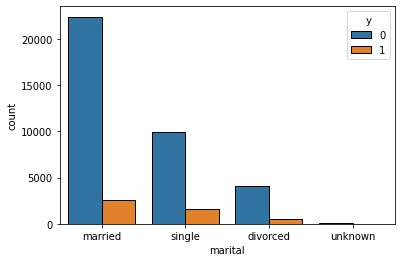

In [63]:
sns.countplot(data=bank_df2, x='marital',hue ='y', edgecolor ='black')
print('##############################################')
print('Unkown job clients = ', bank_df2[(bank_df2['marital'] =='unknown')].shape[0])
print('##############################################')
print("Percentage of unknown client's marital =" ,round(bank_df2[(bank_df2['marital'] =='unknown')].shape[0]/bank_df2.shape[0]*100,2),'%')

**Education**

In [64]:
bank_df2.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

##############################################
Unkown job clients =  1731
##############################################
Percentage of unknown client's education level = 4.2 %


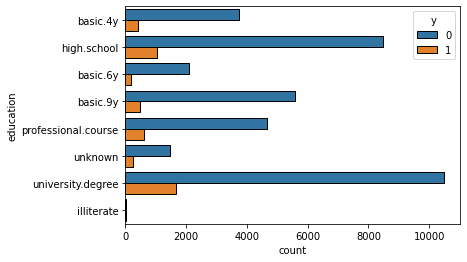

In [65]:
sns.countplot(data=bank_df2, y='education',hue ='y', edgecolor ='black')
print('##############################################')
print('Unkown job clients = ', bank_df2[(bank_df2['education'] =='unknown')].shape[0])
print('##############################################')
print("Percentage of unknown client's education level =" ,round(bank_df2[(bank_df['education'] =='unknown')].shape[0]/bank_df2.shape[0]*100,2),'%')

**Default**

In [66]:
bank_df2.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

##############################################
Unkown job clients =  8597
##############################################
Percentage of unknown client's default = 20.87 %


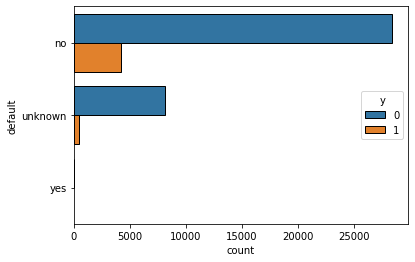

In [67]:
sns.countplot(data=bank_df2, y='default',hue ='y', edgecolor ='black')
print('##############################################')
print('Unkown job clients = ', bank_df2[(bank_df2['default'] =='unknown')].shape[0])
print('##############################################')
print("Percentage of unknown client's default =" ,round(bank_df2[(bank_df2['default'] =='unknown')].shape[0]/bank_df2.shape[0]*100,2),'%')

**Housing**

In [68]:
bank_df2.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

##############################################
Unkown job clients =  990
##############################################
Percentage of unknown client's default = 2.4 %


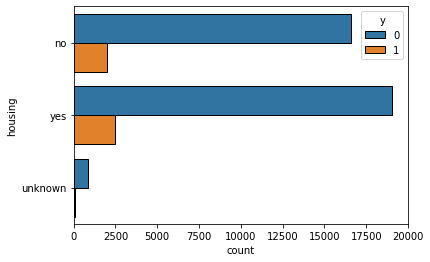

In [69]:
sns.countplot(data=bank_df2, y='housing',hue ='y', edgecolor ='black')
print('##############################################')
print('Unkown job clients = ', bank_df2[(bank_df2['housing'] =='unknown')].shape[0])
print('##############################################')
print("Percentage of unknown client's default =" ,round(bank_df2[(bank_df['housing'] =='unknown')].shape[0]/bank_df2.shape[0]*100,2),'%')

**Loan**

In [70]:
bank_df2.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

##############################################
Unkown job clients =  990
##############################################
Percentage of unknown client's default = 2.4 %


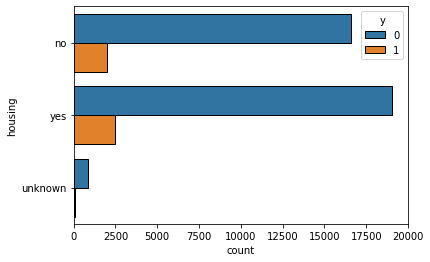

In [71]:
sns.countplot(data=bank_df2, y='housing',hue ='y', edgecolor ='black')
print('##############################################')
print('Unkown job clients = ', bank_df2[(bank_df2['housing'] =='unknown')].shape[0])
print('##############################################')
print("Percentage of unknown client's default =" ,round(bank_df2[(bank_df2['housing'] =='unknown')].shape[0]/bank_df2.shape[0]*100,2),'%')

### **Categorical Features Imputation**

In [72]:
bank_df2.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [73]:
bank_df2.replace('unknown', np.nan, regex=True,inplace=True)
bank_df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.720001,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0.112969,31.606961,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,0.720001,services,married,high.school,NaN,no,no,telephone,may,mon,...,0.112969,31.606961,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,-0.212528,services,married,high.school,no,yes,no,telephone,may,mon,...,0.112969,31.606961,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,-0.373811,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0.112969,31.606961,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,0.720001,services,married,high.school,no,no,yes,telephone,may,mon,...,0.112969,31.606961,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


Text(0, 0.5, 'NAs')

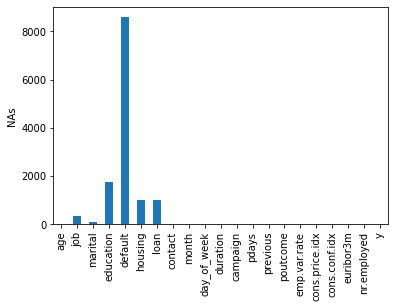

In [74]:
bank_df2.isna().sum().plot.bar()
plt.ylabel("NAs")

In [75]:
eliminacion = bank_df2.copy()
eliminacion = eliminacion.dropna()
print('Se eliminaron ',bank_df2.shape[0]-eliminacion.shape[0],' instancias por los Nan')
print('Equivale a un  ',round(((bank_df2.shape[0]-eliminacion.shape[0])/bank_df2.shape[0])*100,2),' % del dataset original')
print( 'Tamaño del dataset actual = ',eliminacion.shape[0])

Se eliminaron  10700  instancias por los Nan
Equivale a un   25.98  % del dataset original
Tamaño del dataset actual =  30488


In [76]:
bank_df3 = eliminacion.copy()
bank_df3 = bank_df3.drop("default", axis=1)

In [77]:
bank_df3.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.720001,housemaid,married,basic.4y,no,no,telephone,may,mon,0.013228,0.112969,31.606961,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,-0.212528,services,married,high.school,yes,no,telephone,may,mon,0.013228,0.112969,31.606961,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,-0.373811,admin.,married,basic.6y,no,no,telephone,may,mon,-0.665267,0.112969,31.606961,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,0.720001,services,married,high.school,no,yes,telephone,may,mon,0.206656,0.112969,31.606961,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,0.720001,admin.,married,professional.course,no,no,telephone,may,mon,-1.172641,0.112969,31.606961,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


## **Numerical features analysis**

In [78]:
#Numerical features

numerical = bank_df3.select_dtypes(include=[np.number])
numerical_cols = numerical.columns.to_list()
numerical.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
mean,-0.057266,-0.942433,-0.110333,30.349027,0.168476,-0.071510,93.523311,-40.602263,3.459938,5160.813409,0.126574
std,0.345749,2.093120,0.284022,5.938858,0.407301,1.610399,0.585374,4.789249,1.777231,75.158065,0.332501
min,-0.426458,-6.274154,-0.780935,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,-0.368642,-1.526849,-0.289139,31.606961,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000,0.000000
50%,-0.182202,-0.319160,-0.052931,31.606961,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000,0.000000
75%,0.060922,0.206656,0.112969,31.606961,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,0.720001,1.904707,0.112969,31.606961,2.645751,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


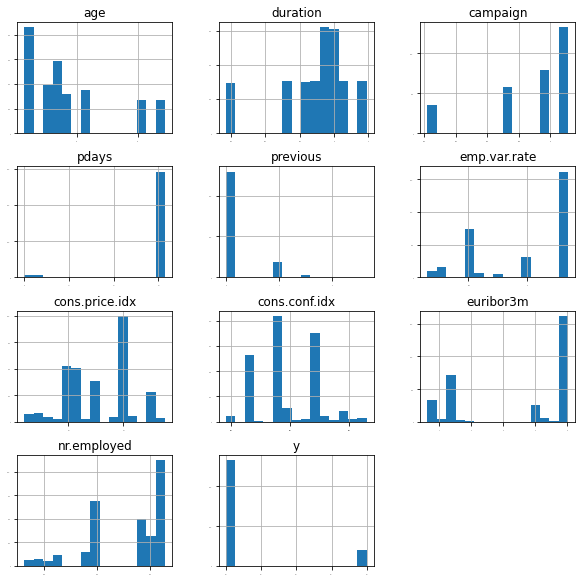

In [79]:
numerical.hist(bins = 15, figsize = (10,10), xlabelsize = 0.1, ylabelsize = 0.1)
plt.show()

In [80]:
#bank_df4 = bank_df3.drop(["pdays", "previous"], axis=1)

In [81]:
bank_df3.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.720001,housemaid,married,basic.4y,no,no,telephone,may,mon,0.013228,0.112969,31.606961,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,-0.212528,services,married,high.school,yes,no,telephone,may,mon,0.013228,0.112969,31.606961,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,-0.373811,admin.,married,basic.6y,no,no,telephone,may,mon,-0.665267,0.112969,31.606961,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,0.720001,services,married,high.school,no,yes,telephone,may,mon,0.206656,0.112969,31.606961,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,0.720001,admin.,married,professional.course,no,no,telephone,may,mon,-1.172641,0.112969,31.606961,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [82]:
bank_df3.shape

(30488, 20)

Final dataframe

In [83]:
final_df = bank_df3.copy()

In [84]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  float64
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   housing         30488 non-null  object 
 5   loan            30488 non-null  object 
 6   contact         30488 non-null  object 
 7   month           30488 non-null  object 
 8   day_of_week     30488 non-null  object 
 9   duration        30488 non-null  float64
 10  campaign        30488 non-null  float64
 11  pdays           30488 non-null  float64
 12  previous        30488 non-null  float64
 13  poutcome        30488 non-null  object 
 14  emp.var.rate    30488 non-null  float64
 15  cons.price.idx  30488 non-null  float64
 16  cons.conf.idx   30488 non-null  float64
 17  euribor3m       30488 non-null 

In [85]:
categorical_cols = final_df.select_dtypes(include="object").columns.to_list()
#categorical_cols.remove("y")
categorical_cols

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [86]:
numerical_cols = final_df.select_dtypes(include=[np.number]).columns.to_list()
numerical_cols.remove("y")
numerical_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

## **Modeling**

In [87]:
from pycaret.classification import *

In [89]:
clfs = setup(data = final_df, target = 'y',
             session_id=234, normalize=True, 
             numeric_features=numerical_cols, categorical_features=categorical_cols, 
             transformation = True, 
             remove_multicollinearity = True, multicollinearity_threshold = 0.95, 
             fix_imbalance=True,
             data_split_stratify=True)

,Description,Value
0,session_id,234
1,Target,y
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(30488, 20)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [90]:
models = compare_models(sort="AUC", n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8971,0.9342,0.5617,0.6011,0.5803,0.5218,0.5224,0.7380
gbc,Gradient Boosting Classifier,0.8782,0.9275,0.7749,0.5128,0.6170,0.5481,0.5648,4.6130
lr,Logistic Regression,0.8529,0.9265,0.8767,0.4579,0.6015,0.5220,0.5635,1.1750
lda,Linear Discriminant Analysis,0.8402,0.9261,0.8982,0.4366,0.5874,0.5027,0.5531,0.5230
rf,Random Forest Classifier,0.8942,0.9229,0.5328,0.5922,0.5606,0.5007,0.5018,1.9740
ada,Ada Boost Classifier,0.8796,0.9178,0.6887,0.5185,0.5913,0.5223,0.5298,1.2030
et,Extra Trees Classifier,0.8874,0.9052,0.4806,0.5662,0.5195,0.4562,0.4584,2.3340
knn,K Neighbors Classifier,0.8238,0.8665,0.7982,0.4016,0.5343,0.4400,0.4795,4.3710
nb,Naive Bayes,0.8211,0.7956,0.5545,0.3773,0.4438,0.3447,0.3562,0.2280
dt,Decision Tree Classifier,0.8685,0.7206,0.5195,0.4820,0.4999,0.4243,0.4248,0.3690


In [91]:
lgbm = create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8862,0.9309,0.5055,0.5569,0.5300,0.4654,0.4661
1,0.9053,0.9397,0.5889,0.6360,0.6115,0.5577,0.5583
2,0.8932,0.9320,0.5630,0.5802,0.5714,0.5104,0.5105
3,0.9030,0.9377,0.5852,0.6245,0.6042,0.5490,0.5494
4,0.8899,0.9306,0.5556,0.5660,0.5607,0.4978,0.4978
5,0.8889,0.9322,0.5593,0.5613,0.5603,0.4967,0.4967
6,0.8960,0.9284,0.5259,0.6017,0.5613,0.5026,0.5040
7,0.8983,0.9354,0.5630,0.6056,0.5835,0.5257,0.5261
8,0.8978,0.9292,0.5963,0.5963,0.5963,0.5378,0.5378
9,0.9124,0.9460,0.5741,0.6828,0.6237,0.5746,0.5773


In [92]:
#trained model object is stored in the variable 'lgbm'. 
print(lgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=234, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [93]:
tuned_lgbm = tune_model(lgbm, optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8904,0.9321,0.5498,0.5709,0.5602,0.4976,0.4977
1,0.9025,0.9387,0.6111,0.6157,0.6134,0.5576,0.5576
2,0.8913,0.9282,0.5926,0.5674,0.5797,0.5173,0.5175
3,0.9067,0.9397,0.6407,0.6291,0.6349,0.5814,0.5814
4,0.8927,0.9307,0.6074,0.5714,0.5889,0.5272,0.5276
5,0.8922,0.9284,0.5889,0.5719,0.5803,0.5185,0.5186
6,0.8927,0.9264,0.5481,0.5804,0.5638,0.5027,0.5030
7,0.8978,0.9355,0.6000,0.5956,0.5978,0.5393,0.5393
8,0.8978,0.9306,0.5926,0.5970,0.5948,0.5364,0.5364
9,0.9110,0.9436,0.5852,0.6695,0.6245,0.5743,0.5759


In [94]:
#tuned model object is stored in the variable 'tuned_lgbm'. 
print(tuned_lgbm)

LGBMClassifier(bagging_fraction=0.9, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=16, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=180, n_jobs=-1, num_leaves=4, objective=None,
               random_state=234, reg_alpha=0.7, reg_lambda=3, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


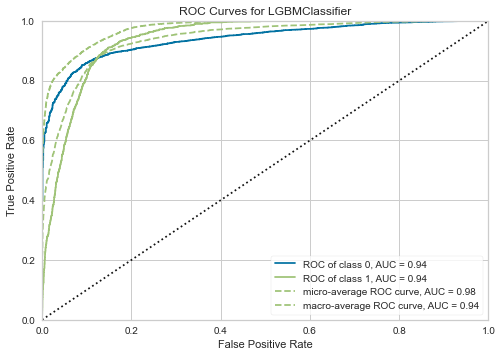

In [95]:
plot_model(tuned_lgbm, plot = 'auc')

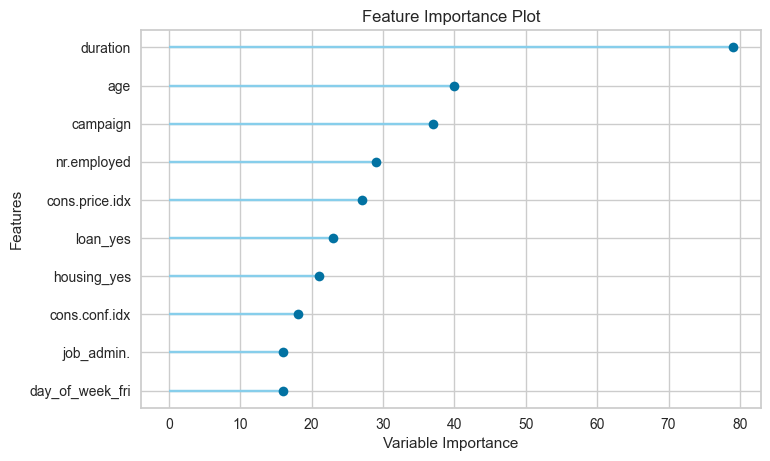

In [96]:
plot_model(tuned_lgbm, plot='feature')

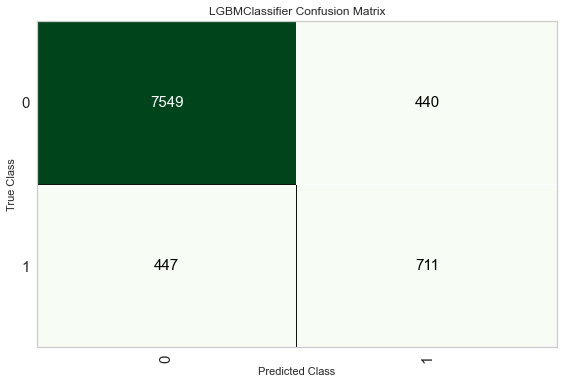

In [97]:
plot_model(tuned_lgbm, plot = 'confusion_matrix')

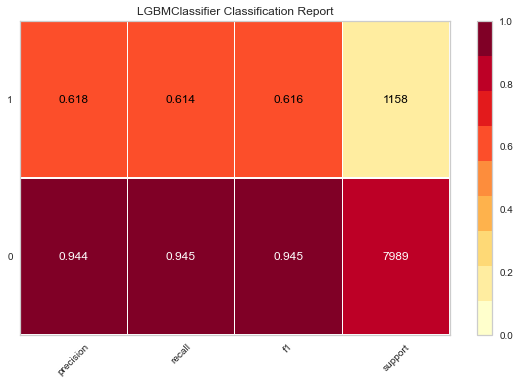

In [98]:
plot_model(tuned_lgbm, plot = 'class_report')

### **Blending**

In [101]:
#catboost = create_model("catboost")
#xgb = create_model("xgboost")
rf = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8899,0.9188,0.4945,0.5776,0.5328,0.4708,0.4727
1,0.9039,0.9292,0.5630,0.6360,0.5972,0.5429,0.5442
2,0.8988,0.9218,0.5333,0.6154,0.5714,0.5144,0.5161
3,0.8988,0.9270,0.5593,0.6089,0.5830,0.5255,0.5261
4,0.8866,0.9201,0.5148,0.5560,0.5346,0.4702,0.4706
5,0.8861,0.9242,0.5296,0.5521,0.5406,0.4757,0.4758
6,0.8880,0.9184,0.4963,0.5654,0.5286,0.4654,0.4666
7,0.8913,0.9200,0.5630,0.5714,0.5672,0.5050,0.5050
8,0.8913,0.9132,0.5185,0.5785,0.5469,0.4853,0.4863
9,0.9077,0.9361,0.5556,0.6608,0.6036,0.5518,0.5545


In [102]:
# blend individual models
blend_soft = blend_models(estimator_list = [tuned_lgbm, rf], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8909,0.9298,0.5018,0.5812,0.5386,0.4771,0.4788
1,0.9063,0.9400,0.5815,0.6434,0.6109,0.5578,0.5587
2,0.9011,0.9308,0.5704,0.6185,0.5934,0.5373,0.5378
3,0.9025,0.9388,0.5963,0.6192,0.6075,0.5519,0.5521
4,0.8988,0.9306,0.5815,0.6038,0.5925,0.5347,0.5348
5,0.8871,0.9312,0.5778,0.5512,0.5642,0.4994,0.4995
6,0.8927,0.9269,0.5185,0.5858,0.5501,0.4894,0.4906
7,0.8978,0.9320,0.5852,0.5985,0.5918,0.5334,0.5334
8,0.8936,0.9276,0.5407,0.5863,0.5626,0.5022,0.5027
9,0.9077,0.9456,0.5444,0.6652,0.5988,0.5472,0.5507


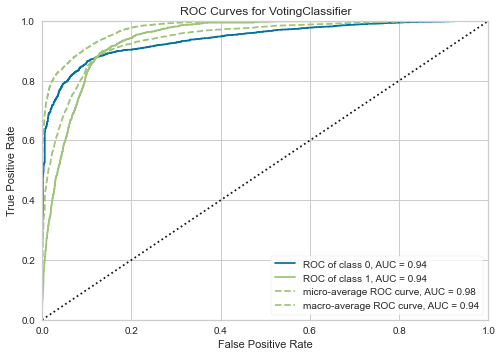

In [103]:
plot_model(blend_soft, plot = 'auc')

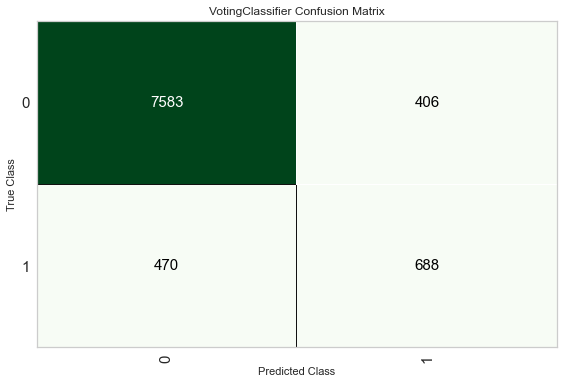

In [104]:
plot_model(blend_soft, plot = 'confusion_matrix')

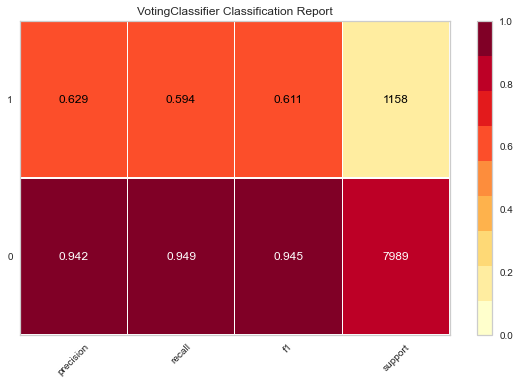

In [105]:
plot_model(blend_soft, plot = 'class_report')

In [107]:
# blend individual models
blend_hard = blend_models(estimator_list = [tuned_lgbm, rf], method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8918,0.0000,0.4207,0.6064,0.4967,0.4383,0.4475
1,0.9100,0.0000,0.4963,0.7053,0.5826,0.5339,0.5443
2,0.8974,0.0000,0.4407,0.6364,0.5208,0.4654,0.4753
3,0.9063,0.0000,0.4815,0.6842,0.5652,0.5145,0.5245
4,0.8932,0.0000,0.4556,0.6029,0.5190,0.4602,0.4659
5,0.8922,0.0000,0.4407,0.6010,0.5085,0.4496,0.4565
6,0.8960,0.0000,0.4185,0.6348,0.5045,0.4491,0.4613
7,0.8983,0.0000,0.4778,0.6293,0.5432,0.4871,0.4930
8,0.9007,0.0000,0.4333,0.6648,0.5247,0.4719,0.4854
9,0.9058,0.0000,0.4333,0.7091,0.5379,0.4889,0.5073


### **Stacking**

In [109]:
stack_soft = stack_models(estimator_list = [rf], meta_model = lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8885,0.9229,0.3911,0.5922,0.4711,0.4117,0.4228
1,0.9016,0.9305,0.4222,0.6786,0.5205,0.4690,0.4854
2,0.8969,0.9275,0.4185,0.6420,0.5067,0.4520,0.4649
3,0.8941,0.9287,0.4185,0.6209,0.5000,0.4433,0.4541
4,0.8922,0.9245,0.4222,0.6064,0.4978,0.4396,0.4487
5,0.8927,0.9265,0.4481,0.6020,0.5138,0.4549,0.4612
6,0.8918,0.9240,0.4111,0.6066,0.4901,0.4320,0.4422
7,0.8880,0.9246,0.4259,0.5779,0.4904,0.4291,0.4354
8,0.8960,0.9192,0.4296,0.6304,0.5110,0.4551,0.4656
9,0.9025,0.9384,0.4259,0.6845,0.5251,0.4741,0.4907


In [110]:
best_auc_model = automl(optimize = 'AUC')

In [111]:
best_auc_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=234, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [112]:
pred_holdouts = predict_model(best_auc_model)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9062,0.9425,0.5803,0.6437,0.6104,0.5572,0.5582


,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,job_admin.,job_blue-collar,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,y,Label,Score
0,1.705792,0.850704,1.017932,-4.722079,2.353059,-2.170394,1.743039,-1.208550,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.8705
1,-0.129087,-1.945373,1.017932,0.211771,2.353059,-0.567006,-0.212817,0.262410,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0.9994
2,-0.271814,1.971956,-0.187584,0.211771,-0.424617,-0.567006,-0.212817,0.262410,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.5891
3,-1.536808,-0.371467,-1.022106,0.211771,-0.424617,1.654168,-0.167889,1.070042,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9984
4,-1.183465,-0.096692,1.017932,0.211771,-0.424617,0.800667,0.902642,0.160269,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9985


In [113]:
final_rf = finalize_model(best_auc_model)

In [114]:
final_rf

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=234, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [72]:
#save model
save_model(final_rf,'Final Model 12May2021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['job', 'marital',
                                                             'education',
                                                             'housing', 'loan',
                                                             'contact', 'month',
                                                             'day_of_week',
                                                             'poutcome'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['age', 'duration',
                                                           'campaign',
                                                           'emp.var.rate',
                                                           '